<a href="https://colab.research.google.com/github/Mayuravarsha/Data-Analytics/blob/main/DA_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Importing the data

In [150]:
from datetime import datetime
print('Process start time :', datetime.now())
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


Process start time : 2021-12-04 15:09:09.461184


In [151]:
import pandas as pd
import numpy as np
import seaborn as sns

df = pd.read_csv('/content/vehicles.csv')


In [152]:
df.shape

(110653, 26)

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110653 entries, 0 to 110652
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            110653 non-null  int64  
 1   url           110653 non-null  object 
 2   region        110652 non-null  object 
 3   region_url    110652 non-null  object 
 4   price         110652 non-null  float64
 5   year          110215 non-null  float64
 6   manufacturer  105754 non-null  object 
 7   model         109235 non-null  object 
 8   condition     67496 non-null   object 
 9   cylinders     65797 non-null   object 
 10  fuel          109975 non-null  object 
 11  odometer      109081 non-null  float64
 12  title_status  108258 non-null  object 
 13  transmission  110053 non-null  object 
 14  VIN           70850 non-null   object 
 15  drive         76907 non-null   object 
 16  size          31442 non-null   object 
 17  type          89028 non-null   object 
 18  pain

In [154]:
df.describe()

,id,price,year,odometer,county,lat,long
count,1.106530e+05,1.106520e+05,110215.000000,1.090810e+05,0.0,110056.000000,110056.000000
mean,7.311921e+09,1.021415e+05,2011.004564,9.782320e+04,NaN,36.008751,-105.194565
std,4.610449e+06,1.399149e+07,9.931277,2.472232e+05,NaN,6.187636,18.960741
min,7.208550e+09,0.000000e+00,1900.000000,0.000000e+00,NaN,-84.122245,-158.599600
25%,7.308703e+09,5.999000e+03,2008.000000,3.733300e+04,NaN,33.391700,-119.844409
50%,7.313377e+09,1.399500e+04,2013.000000,8.311700e+04,NaN,35.189958,-111.924900
75%,7.315589e+09,2.599000e+04,2017.000000,1.300000e+05,NaN,38.758325,-84.411811
max,7.316958e+09,3.024942e+09,2022.000000,1.000000e+07,NaN,82.390818,173.885502


In [155]:
pd.set_option('display.max_columns', None)

In [156]:
df.head(5)

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


Data Cleaning

In [157]:
# Remove column - 'url' since the details present in url is already available in 
# columns - 'region', 'county', 'state'
df = df.drop('url', axis=1)

In [158]:
df['region_url'].unique()[:10]

array(['https://prescott.craigslist.org', 'https://fayar.craigslist.org',
       'https://keys.craigslist.org', 'https://worcester.craigslist.org',
       'https://greensboro.craigslist.org',
       'https://hudsonvalley.craigslist.org',
       'https://medford.craigslist.org', 'https://erie.craigslist.org',
       'https://elpaso.craigslist.org',
       'https://bellingham.craigslist.org'], dtype=object)

In [159]:
# The county column only has 'nan' in it. Therefore, take the county name from 'region_url' column.
df['county'].unique()

array([nan])

In [160]:
# updating 'county' from 'region_from_url' column.
df['county'] = df['region_url'].str.replace('https://','').str.replace('.craigslist.org','')

In [161]:
# drop column - region_url
df = df.drop('region_url', axis=1)
# finding unique list of manufacturer. There are NULL values.
df['manufacturer'].unique()

array([nan, 'gmc', 'chevrolet', 'toyota', 'ford', 'jeep', 'nissan', 'ram',
       'mazda', 'cadillac', 'honda', 'dodge', 'lexus', 'jaguar', 'buick',
       'chrysler', 'volvo', 'audi', 'infiniti', 'lincoln', 'alfa-romeo',
       'subaru', 'acura', 'hyundai', 'mercedes-benz', 'bmw', 'mitsubishi',
       'volkswagen', 'porsche', 'kia', 'rover', 'ferrari', 'mini',
       'pontiac', 'fiat', 'tesla', 'saturn', 'mercury', 'harley-davidson',
       'datsun', 'aston-martin', 'land rover'], dtype=object)

In [162]:
model_df = df.loc[df['manufacturer'].isnull(), ['model']]
model_df['model'].unique()[:50]

array([nan, 'Scion iM Hatchback 4D', 'blue bird bus', '1966 C-30 1 ton',
       'smart fortwo Passion Hatchback', 'F-350', 'lac XT5 Crossover',
       'Sterling Acterra', 'Freightliner Cascadia', 'Maserati Levante',
       'SPECIAL FINANCE PROGRAM 2020', '1987 Saab 900 Turbo',
       'Suzuki XL-7', 'Series', 'scion ia', '1988', 'plymouth voyager',
       'oldsmobile cutlass', 'INTERNATIONAL 4700 DUMP', 'smart fortwo',
       'r XF', '2002 limited 4 runner', 'LBZ Duramax',
       '2002   Corvette Convertible', 'Genesis G80', 'ai Santa Fe',
       'FordE450', 'des-Benz CLA', 'HUMMER H2', 'a Camry',
       'Isuzu NPR HD GAS REG', 'Hino 268', 'International TerraStar',
       'Freightliner M2 106 Medium Duty', 'Blue Bird All American',
       'Isuzu NPR HD GAS CREW', 'Isuzu NPR', 'Workhorse W42', 'he Macan',
       'HUMMER H2 Lifted 4x4', 'des-Benz E-Class', 'Kenworth T300',
       'CX-5', 'Freightliner', 'AutoCar flatbed truck',
       'olet Express Commercial Cutaway', 'AM GENERAL HUMMER

In [163]:
model_df.shape

(4899, 1)

In [164]:
df.shape


(110653, 24)

In [165]:
# update 'manufacturer' to 'other' when its NULL
df.loc[df['manufacturer'].isnull(), ['manufacturer']] = 'other'
df.head(5)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,prescott,6000.0,NaN,other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,prescott,az,NaN,NaN,NaN
1,7218891961,fayetteville,11900.0,NaN,other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fayar,ar,NaN,NaN,NaN
2,7221797935,florida keys,21000.0,NaN,other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,keys,fl,NaN,NaN,NaN
3,7222270760,worcester / central MA,1500.0,NaN,other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,worcester,ma,NaN,NaN,NaN
4,7210384030,greensboro,4900.0,NaN,other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,greensboro,nc,NaN,NaN,NaN


In [166]:
df[df['region'].isnull() == True]


,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
110652,7305775669,NaN,NaN,NaN,other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [167]:
df['region'].unique()[:10]


array(['prescott', 'fayetteville', 'florida keys',
       'worcester / central MA', 'greensboro', 'hudson valley',
       'medford-ashland', 'erie', 'el paso', 'bellingham'], dtype=object)

In [168]:
# removing all records which has price = 0.
df = df[df['price'] != 0]
df['year'].unique()

array([  nan, 2014., 2010., 2020., 2017., 2013., 2012., 2016., 2019.,
       2011., 1992., 2018., 2004., 2015., 2001., 2006., 1968., 2003.,
       2008., 2007., 2005., 1966., 2009., 1998., 2002., 1999., 2021.,
       1997., 1976., 1969., 1995., 1978., 1954., 1979., 1970., 1974.,
       1996., 1987., 2000., 1955., 1960., 1991., 1972., 1988., 1994.,
       1929., 1984., 1986., 1989., 1973., 1946., 1933., 1958., 1937.,
       1985., 1957., 1953., 1942., 1963., 1977., 1993., 1990., 1965.,
       1982., 1948., 1983., 1936., 1932., 1951., 1931., 1980., 1967.,
       1971., 1947., 1981., 1926., 1962., 1975., 1964., 1934., 1952.,
       1940., 1959., 1950., 1930., 1956., 1922., 1928., 2022., 1901.,
       1941., 1924., 1927., 1939., 1923., 1949., 1961., 1935., 1918.,
       1900., 1938., 1913., 1916., 1943.])

In [169]:
# There are totally 82 records that have year higher than current year ie) 2020. They have to be removed as well.
df[df['year'] > 2020].shape

(700, 24)

In [170]:
df = df[df['year'] < 2020]
# 'model' column has lot of inconsistent data eg). Anything, sequoia limited, 30 YEARS.EXP.
df['model'].unique()

array(['sierra 1500 crew cab slt', 'silverado 1500',
       'tundra double cab sr', ..., 'forester 2.5 xt limited',
       'm6 6-series', '1978 F100'], dtype=object)

In [171]:
# drop columns - lat, long
df = df.drop(['lat','long'], axis=1)
len(df)

96147

In [172]:
# Identify the no.of missing values in each column and their percentage compared to total.
missing_vals = df.isnull().sum().sort_values(ascending = False)
(missing_vals/len(df))*100

size            70.872726
cylinders       38.019907
VIN             37.958543
condition       36.402592
drive           30.085182
paint_color     28.670681
type            19.359938
title_status     1.966780
model            1.205446
odometer         1.016152
fuel             0.543959
transmission     0.406669
region           0.000000
price            0.000000
year             0.000000
manufacturer     0.000000
posting_date     0.000000
state            0.000000
image_url        0.000000
description      0.000000
county           0.000000
id               0.000000
dtype: float64

In [173]:
# Removing rows which has less than 5% of NULLs in columns.
df=df.dropna(subset=['model','fuel','transmission','title_status','description'])
df.shape

(92291, 22)

In [174]:
df.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,county,state,posting_date
27,7316814884,auburn,33590.0,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,clean,other,3GTP1VEC4EG551563,NaN,NaN,pickup,white,https://images.craigslist.org/00R0R_lwWjXSEWNa...,Carvana is the safer way to buy a car During t...,auburn,al,2021-05-04T12:31:18-0500
28,7316814758,auburn,22590.0,2010.0,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,clean,other,1GCSCSE06AZ123805,NaN,NaN,pickup,blue,https://images.craigslist.org/00R0R_lwWjXSEWNa...,Carvana is the safer way to buy a car During t...,auburn,al,2021-05-04T12:31:08-0500
30,7316743432,auburn,30990.0,2017.0,toyota,tundra double cab sr,good,8 cylinders,gas,41124.0,clean,other,5TFRM5F17HX120972,NaN,NaN,pickup,red,https://images.craigslist.org/00x0x_1y9kIOzGCF...,Carvana is the safer way to buy a car During t...,auburn,al,2021-05-04T10:41:31-0500
31,7316356412,auburn,15000.0,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,NaN,rwd,full-size,truck,black,https://images.craigslist.org/00404_l4loxHvdQe...,2013 F-150 XLT V6 4 Door. Good condition. Leve...,auburn,al,2021-05-03T14:02:03-0500
32,7316343444,auburn,27990.0,2012.0,gmc,sierra 2500 hd extended cab,good,8 cylinders,gas,68696.0,clean,other,1GT220CG8CZ231238,4wd,NaN,pickup,black,https://images.craigslist.org/00V0V_ftJbKrOgdi...,Carvana is the safer way to buy a car During t...,auburn,al,2021-05-03T13:41:25-0500


In [175]:
df['cylinders'].unique()


array(['8 cylinders', '6 cylinders', nan, '4 cylinders', '5 cylinders',
       '3 cylinders', '10 cylinders', '12 cylinders', 'other'],
      dtype=object)

In [176]:
df['type'].unique()

array(['pickup', 'truck', 'other', nan, 'coupe', 'hatchback', 'mini-van',
       'SUV', 'sedan', 'offroad', 'bus', 'convertible', 'wagon', 'van'],
      dtype=object)

In [177]:
# Using forward fill for the columns - 'paint_color', 'drive', 'cylinders', 'type'
df['type'] = df['type'].fillna(method='ffill')
df['paint_color'] = df['paint_color'].fillna(method='ffill')
df['drive'] = df['drive'].fillna(method='ffill')
df['cylinders'] = df['cylinders'].fillna(method='ffill')
df.isnull().sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

id                  0
region              0
price               0
year                0
manufacturer        0
model               0
condition       33323
cylinders           0
fuel                0
odometer          948
title_status        0
transmission        0
VIN             35629
drive               3
size            64710
type                0
paint_color         0
image_url           0
description         0
county              0
state               0
posting_date        0
dtype: int64

In [178]:
df['condition'].unique()

array(['good', 'excellent', 'fair', 'like new', nan, 'new', 'salvage'],
      dtype=object)

In [179]:
# updating the condition as 'new' for all vehicles whose year is 2019 and above
df.loc[df.year>=2019, 'condition'] = df.loc[df.year>=2019, 'condition'].fillna('new')
df.groupby(['condition']).count()['year']

condition
excellent    25840
fair          1647
good         26597
like new      4560
new           2021
salvage        176
Name: year, dtype: int64

In [180]:
df.isnull().sum()

id                  0
region              0
price               0
year                0
manufacturer        0
model               0
condition       31450
cylinders           0
fuel                0
odometer          948
title_status        0
transmission        0
VIN             35629
drive               3
size            64710
type                0
paint_color         0
image_url           0
description         0
county              0
state               0
posting_date        0
dtype: int64

In [181]:
# Addressing the NULLs in 'odometer' column.

# Since odometer is related to the condition of the vehicle, it can be used to fill the missing odometer values.
# The mean of odometer values for each condition is calculated and is used to fill the NULL values for those 
# corresponding condition.
# Find the total distinct values for 'condition'
conditions = list(df['condition'].unique())
conditions.pop(3) # removing null value from list
conditions

['good', 'excellent', 'fair', nan, 'new', 'salvage']

In [182]:
# Find the corresponding mean value of 'odometer' for each value in 'condition'
mean_odometer_per_condition_df = df.groupby('condition').mean()['odometer'].reset_index()
mean_odometer_per_condition_df

,condition,odometer
0,excellent,106881.083353
1,fair,195908.041894
2,good,89760.258149
3,like new,85183.347807
4,new,31744.211730
5,salvage,162213.778409


In [183]:
excellent_odo_mean = df[df['condition'] == 'excellent']['odometer'].mean()
good_odo_mean = df[df['condition'] == 'good']['odometer'].mean()
like_new_odo_mean = df[df['condition'] == 'like new']['odometer'].mean()
salvage_odo_mean = df[df['condition'] == 'salvage']['odometer'].mean()
fair_odo_mean = df[df['condition'] == 'fair']['odometer'].mean()
print('Like new average odometer:', round( like_new_odo_mean,2))
print('Excellent average odometer:', round( excellent_odo_mean,2))
print('Good average odometer:', round( good_odo_mean,2))
print('Fair average odometer:', round( fair_odo_mean,2))
print('Salvage average odometer:', round( salvage_odo_mean,2))

Like new average odometer: 85183.35
Excellent average odometer: 106881.08
Good average odometer: 89760.26
Fair average odometer: 195908.04
Salvage average odometer: 162213.78


In [184]:
# Update the 'condition' based on the average 'odometer' values for each 'condition'

df.loc[df['odometer'] <= like_new_odo_mean, 'condition'] = df.loc[df['odometer'] <= like_new_odo_mean, 'condition'].fillna('like new')

df.loc[df['odometer'] >= fair_odo_mean, 'condition'] = df.loc[df['odometer'] >= fair_odo_mean, 'condition'].fillna('fair')

df.loc[((df['odometer'] > good_odo_mean) & 
       (df['odometer'] <= excellent_odo_mean)), 'condition'] = df.loc[((df['odometer'] > good_odo_mean) & 
       (df['odometer'] <= excellent_odo_mean)), 'condition'].fillna('excellent')

df.loc[((df['odometer'] > like_new_odo_mean) & 
       (df['odometer'] <= good_odo_mean)), 'condition'] = df.loc[((df['odometer'] > like_new_odo_mean) & 
       (df['odometer'] <= good_odo_mean)), 'condition'].fillna('good')

df.loc[((df['odometer'] > good_odo_mean) & 
       (df['odometer'] <= fair_odo_mean)), 'condition'] = df.loc[((df['odometer'] > good_odo_mean) & 
       (df['odometer'] <= fair_odo_mean)), 'condition'].fillna('salvage')

In [185]:
# 'model' can be related to 'size'.
# checking the sizes for model = 'patriot'
df.loc[df['model'] == 'patriot', 'size'].unique()

#There are more than 1 size for the same model. Therefore, this column is not reliable and has to be removed. 
# The car details can be scrapped from a different source and then combined to populate the correct car features.

array([nan, 'mid-size', 'compact', 'full-size', 'sub-compact'],
      dtype=object)

In [186]:
# dropping the column - 'size' since its not reliable
# dropping the column - 'id' since it doesn't have any meaning
# dropping the column - 'image_url' since it doesn't have any meaning
# dropping the column - 'vin' since it doesn't have any meaning
# dropping the column - 'description' - few rows contain important details. dropping for now.

df = df.drop(['size','id','image_url','VIN','description'], axis = 1)

Exploratory Data Analysis

In [187]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Number of vehicles listed on craigslist across different conditions')

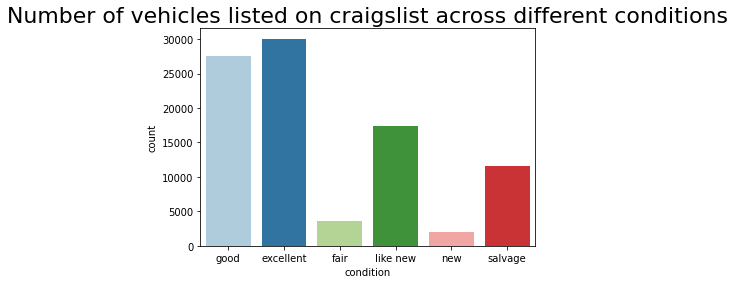

In [188]:
sns.countplot(x='condition', data=df, palette=("Paired"))
plt.title('Number of vehicles listed on craigslist across different conditions', fontsize=22)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


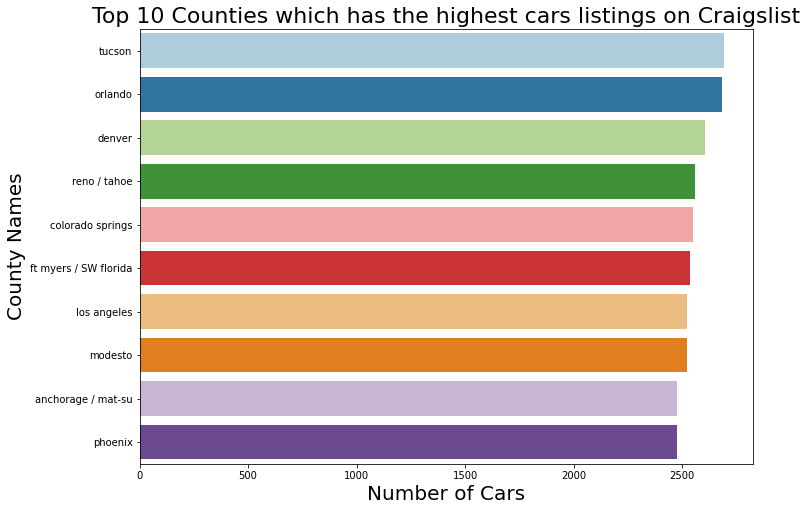

In [189]:
region_count  = df['region'].value_counts()
region_count = region_count[:10,]
plt.figure(figsize=(11,8))
sns.barplot(region_count.values, region_count.index, alpha=1,palette=("Paired"))
plt.title('Top 10 Counties which has the highest cars listings on Craigslist', fontsize=22)
plt.xlabel('Number of Cars', size="20")
plt.ylabel('County Names', size="20")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


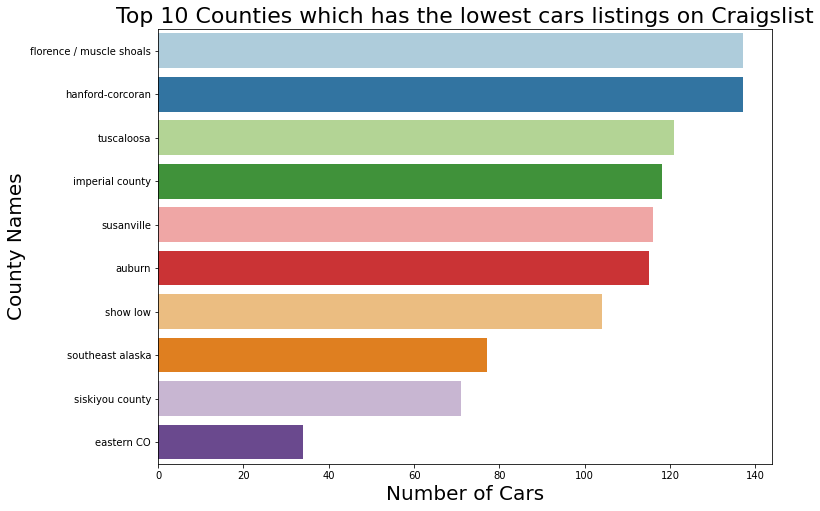

In [190]:
region_count  = df['region'].value_counts()
region_count = region_count[-10:,]
plt.figure(figsize=(11,8))
sns.barplot(region_count.values, region_count.index, alpha=1,palette=("Paired"))
plt.title('Top 10 Counties which has the lowest cars listings on Craigslist', fontsize=22)
plt.xlabel('Number of Cars', size="20")
plt.ylabel('County Names', size="20")
plt.show()

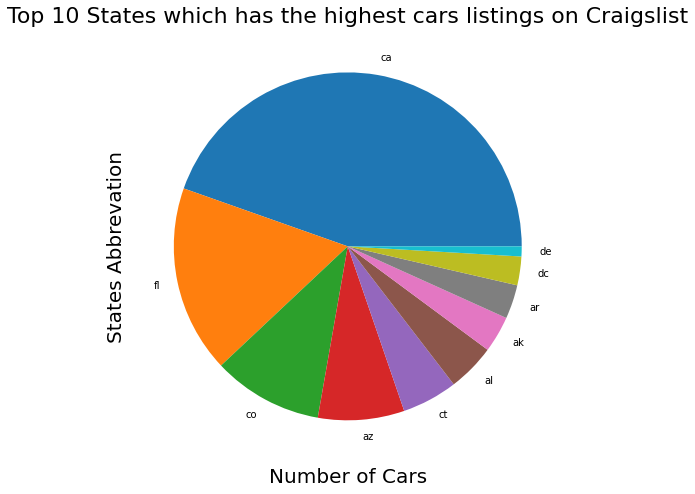

In [191]:
state_count  = df['state'].value_counts()
state_count = state_count[-10:,]
plt.figure(figsize=(11,8))
state_count.plot(kind='pie', subplots=True, figsize=(8, 8))
plt.title('Top 10 States which has the highest cars listings on Craigslist', fontsize=22)
plt.xlabel('Number of Cars', size="20")
plt.ylabel('States Abbrevation', size="20")
plt.show()


In [192]:
top_priced_counties = df.groupby('county').sum()['price'].reset_index().sort_values('price', ascending=False)[:10]
top_priced_counties

,county,price
9,delaware,3.038551e+09
25,humboldt,1.117282e+09
11,dothan,1.051995e+08
0,anchorage,5.856509e+07
17,fortmyers,5.272437e+07
2,bakersfield,5.115968e+07
51,orlando,5.050314e+07
7,cosprings,5.016440e+07
59,reno,4.923700e+07
75,tucson,4.795808e+07


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


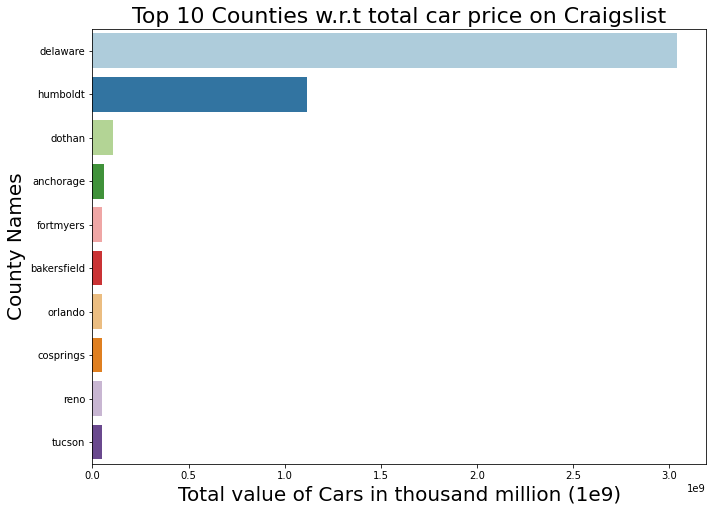

In [193]:
plt.figure(figsize=(11,8))
sns.barplot(top_priced_counties.price, top_priced_counties.county, alpha=1,palette=("Paired"))
plt.title('Top 10 Counties w.r.t total car price on Craigslist', fontsize=22)
plt.xlabel('Total value of Cars in thousand million (1e9)', size="20")
plt.ylabel('County Names', size="20")
plt.show()

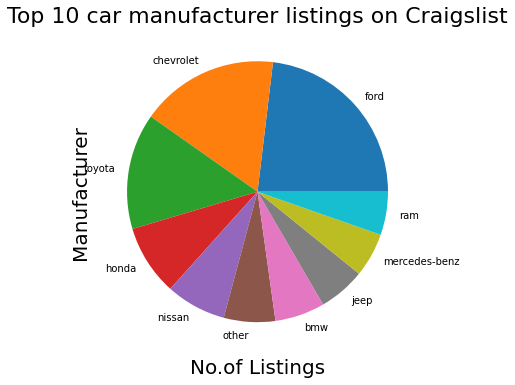

In [194]:
manufacturer_count = df['manufacturer'].value_counts().iloc[:10]
plt.figure(figsize=(10,6))
manufacturer_count.plot(kind='pie', subplots=True, figsize=(8, 8))
plt.title('Top 10 car manufacturer listings on Craigslist', fontsize=22)
plt.xlabel('No.of Listings', size="20")
plt.ylabel('Manufacturer', size="20")
plt.show()

In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92291 entries, 27 to 110651
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   region        92291 non-null  object 
 1   price         92291 non-null  float64
 2   year          92291 non-null  float64
 3   manufacturer  92291 non-null  object 
 4   model         92291 non-null  object 
 5   condition     92166 non-null  object 
 6   cylinders     92291 non-null  object 
 7   fuel          92291 non-null  object 
 8   odometer      91343 non-null  float64
 9   title_status  92291 non-null  object 
 10  transmission  92291 non-null  object 
 11  drive         92288 non-null  object 
 12  type          92291 non-null  object 
 13  paint_color   92291 non-null  object 
 14  county        92291 non-null  object 
 15  state         92291 non-null  object 
 16  posting_date  92291 non-null  object 
dtypes: float64(3), object(14)
memory usage: 15.2+ MB


In [196]:
df['cylinders'].unique()

array(['8 cylinders', '6 cylinders', '4 cylinders', '5 cylinders',
       '3 cylinders', '10 cylinders', '12 cylinders', 'other'],
      dtype=object)

In [197]:
df['transmission'].unique()

array(['other', 'automatic', 'manual'], dtype=object)

In [198]:
df['title_status'].unique()

array(['clean', 'rebuilt', 'lien', 'salvage', 'missing', 'parts only'],
      dtype=object)

Feature Preprocessing

In [199]:
# Removing region since we already have 'county'
df=df.drop('region', axis=1)
# Removing rows which has NULLs in conditon and odometer.
df=df.dropna(subset=['odometer','condition'])
# Identify the no.of missing values in each column and their percentage compared to total.
missing_vals = df.isnull().sum().sort_values(ascending = False)
(missing_vals/len(df))*100

drive           0.003284
posting_date    0.000000
state           0.000000
county          0.000000
paint_color     0.000000
type            0.000000
transmission    0.000000
title_status    0.000000
odometer        0.000000
fuel            0.000000
cylinders       0.000000
condition       0.000000
model           0.000000
manufacturer    0.000000
year            0.000000
price           0.000000
dtype: float64

In [200]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
# convert characters to numbers using label Encoding
df[['county','manufacturer', 'model', 'condition','cylinders', 'fuel', 'title_status', 'transmission','drive', 'type', 'paint_color', 'state']] = df[['county','manufacturer', 'model', 'condition','cylinders', 'fuel', 'title_status', 'transmission','drive','type', 'paint_color', 'state']].apply(le.fit_transform)
df

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,county,state,posting_date
27,33590.0,2014.0,14,9402,2,6,2,57923.0,0,2,3,8,10,1,1,2021-05-04T12:31:18-0500
28,22590.0,2010.0,7,9526,2,6,2,71229.0,0,2,3,8,1,1,1,2021-05-04T12:31:08-0500
30,30990.0,2017.0,39,10720,2,6,2,41124.0,0,2,3,8,8,1,1,2021-05-04T10:41:31-0500
31,15000.0,2013.0,13,5426,0,5,2,128000.0,0,0,2,10,0,1,1,2021-05-03T14:02:03-0500
32,27990.0,2012.0,14,9447,2,6,2,68696.0,0,2,0,8,0,1,1,2021-05-03T13:41:25-0500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110646,1900.0,2000.0,7,10293,1,6,2,235380.0,0,0,2,8,10,65,9,2021-04-12T17:11:52-0400
110647,16688.0,2016.0,6,4471,0,6,2,89870.0,0,0,2,9,1,65,9,2021-04-12T16:57:38-0400
110649,34888.0,2011.0,13,5511,0,6,0,106860.0,0,0,0,8,1,65,9,2021-04-12T15:52:40-0400
110650,7900.0,2008.0,4,11122,0,5,2,160799.0,0,0,0,0,1,65,9,2021-04-12T15:45:41-0400


Handling continous values - Scaling down

In [201]:
df["odometer"] = np.sqrt(preprocessing.minmax_scale(df["odometer"]))


In [202]:
df

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,county,state,posting_date
27,33590.0,2014.0,14,9402,2,6,2,0.076107,0,2,3,8,10,1,1,2021-05-04T12:31:18-0500
28,22590.0,2010.0,7,9526,2,6,2,0.084397,0,2,3,8,1,1,1,2021-05-04T12:31:08-0500
30,30990.0,2017.0,39,10720,2,6,2,0.064128,0,2,3,8,8,1,1,2021-05-04T10:41:31-0500
31,15000.0,2013.0,13,5426,0,5,2,0.113137,0,0,2,10,0,1,1,2021-05-03T14:02:03-0500
32,27990.0,2012.0,14,9447,2,6,2,0.082883,0,2,0,8,0,1,1,2021-05-03T13:41:25-0500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110646,1900.0,2000.0,7,10293,1,6,2,0.153421,0,0,2,8,10,65,9,2021-04-12T17:11:52-0400
110647,16688.0,2016.0,6,4471,0,6,2,0.094800,0,0,2,9,1,65,9,2021-04-12T16:57:38-0400
110649,34888.0,2011.0,13,5511,0,6,0,0.103373,0,0,0,8,1,65,9,2021-04-12T15:52:40-0400
110650,7900.0,2008.0,4,11122,0,5,2,0.126807,0,0,0,0,1,65,9,2021-04-12T15:45:41-0400


Train Test Split


In [203]:
# Seperate Features and Outcome
X = df.drop('price',axis=1).values
y = df.price.values
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=2)
skf.get_n_splits(X, y)

for train_index, test_index in skf.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

# works for classification
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  UserWarning,


TRAIN: [  146   251   311 ... 91340 91341 91342] TEST: [    0     1     2 ... 91072 91094 91331]
TRAIN: [    0     1     2 ... 91072 91094 91331] TEST: [  146   251   311 ... 91340 91341 91342]


In [204]:
print (X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(45672, 15) (45672,) (45671, 15) (45671,)


Machine Learning Algorithms

In [205]:
# Create a dataframe to store accuracy scores of different algorithms
accuracy_df = pd.DataFrame(columns=('r2', 'rmse'))

In [209]:
#DECISION TREE
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn import metrics
import math
from sklearn.metrics import mean_squared_error as MSE

# Fit
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Metrics
r2 = round(metrics.r2_score(y_test, y_pred),2)
rmse = round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),2)
accuracy_df = accuracy_df.append(pd.DataFrame({'r2':[r2],'rmse':[rmse]}, index = ['Decision Tree Baseline']))
accuracy_df

ValueError: ignored

In [ ]:
#Decision Tree with auto Hyper Parameter Tuning with Grid Search
from sklearn.model_selection import GridSearchCV

scoring = metrics.make_scorer(metrics.mean_squared_error)

param_grid = {
'criterion':['mse'] 
,'splitter':['best','random']
,'max_depth':[4, 5, 6, 7, 8]
,'min_samples_split':[0.8, 2]
,'max_features':['auto','sqrt','log2']
}

g_cv = GridSearchCV(DecisionTreeRegressor(random_state=0),param_grid=param_grid,scoring=scoring, cv=5, refit=True)
g_cv.fit(X_train, y_train)
g_cv.best_params_
result = g_cv.cv_results_
# print(result)

# Predict
y_pred = g_cv.best_estimator_.predict(X_test)

# Metrics
r2 = round(metrics.r2_score(y_test, y_pred),2)
rmse = round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),2)
accuracy_df = accuracy_df.append(pd.DataFrame({'r2':[r2],'rmse':[rmse]}, index = ['Decision Tree HyperParam Tuning']))
accuracy_df.sort_values('rmse')

In [ ]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor

# Fit
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Metrics
r2 = round(metrics.r2_score(y_test, y_pred),2)
rmse = round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),2)
accuracy_df = accuracy_df.append(pd.DataFrame({'r2':[r2],'rmse':[rmse]}, index = ['Random Forest Baseline']))
accuracy_df.sort_values('rmse')

In [ ]:
#Random Forest with auto Hyper Parameter Tuning with Grid Search
from sklearn.model_selection import GridSearchCV scoring = metrics.make_scorer(metrics.mean_squared_error) param_grid = { # 'n_estimators':[50,70,100,120,130] # 'max_features':['auto','sqrt','log2'] #,'oob_score':[False, True] # whether to use out-of-bag samples to estimate the R^2 on unseen data. # ,'bootstrap':[False, True] # ,'random_state':[10, None] # ,'warm_start':[True, False] 'max_depth':[4, 5, 6, 7, 8] # ,'min_samples_split':[0.8, 2, 3] } g_cv = GridSearchCV(RandomForestRegressor(random_state=0),param_grid=param_grid,scoring=scoring, cv=5, refit=True)
g_cv.fit(X_train, y_train) g_cv.best_params_ result = g_cv.cv_results_ 
# print(result) 
# Predict y_pred = g_cv.best_estimator_.predict(X_test) # Metrics r2 = round(metrics.r2_score(y_test, y_pred),2) rmse = round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),2) accuracy_df = accuracy_df.append(pd.DataFrame({'r2':[r2],'rmse':[rmse]}, index = ['Random Forest HyperParam Tuning']))
accuracy_df

In [ ]:
#Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor

# Fit
model = GradientBoostingRegressor(random_state=0)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Metrics
r2 = round(metrics.r2_score(y_test, y_pred),2)
rmse = round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),2)
accuracy_df = accuracy_df.append(pd.DataFrame({'r2':[r2],'rmse':[rmse]}, index = ['Gradient Boosting Baseline']))
accuracy_df.sort_values('rmse')

In [ ]:
#XGBoost
from xgboost import XGBRegressor

# Fit
model = XGBRegressor(random_state=0)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Metrics
r2 = round(metrics.r2_score(y_test, y_pred),2)
rmse = round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),2)
accuracy_df = accuracy_df.append(pd.DataFrame({'r2':[r2],'rmse':[rmse]}, index = ['XGBoost Baseline']))
accuracy_df.sort_values('rmse')


In [ ]:
#XGBoost with Parameters
import xgboost as xgb

model = xgb.XGBRegressor(
#     gamma=1,                 
    learning_rate=0.05,
#     max_depth=3,
#     n_estimators=10000,                                                                    
#     subsample=0.8,
    random_state=34,
    booster='gbtree',    
    objective='reg:squarederror',
    eval_metric='rmse'
) 
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)


# Metrics
r2 = round(metrics.r2_score(y_test, y_pred),2)
rmse = round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),2)
accuracy_df = accuracy_df.append(pd.DataFrame({'r2':[r2],'rmse':[rmse]}, index = ['XGBoost with Parameters']))
accuracy_df.sort_values('rmse')

In [ ]:
#MLP Regressor
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor()
param_grid = {
#               'hidden_layer_sizes': [i for i in range(2,20)],
              'activation': ['relu'],
              'solver': ['adam'],
#               'learning_rate': ['constant'],
#               'learning_rate_init': [0.01],
#               'power_t': [0.5],
#               'alpha': [0.0001],
#               'max_iter': [1000],
              'early_stopping': [True],
              'warm_start': [False]
}
model = GridSearchCV(mlp, param_grid=param_grid, 
                   cv=10, verbose=True, pre_dispatch='2*n_jobs')

model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)


# Metrics
r2 = round(metrics.r2_score(y_test, y_pred),2)
rmse = round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),2)
accuracy_df = accuracy_df.append(pd.DataFrame({'r2':[r2],'rmse':[rmse]}, index = ['MLPRegressor with Parameter Tuning']))
accuracy_df.sort_values('rmse')

In [ ]:
#LightGBM
#Splitting the training data in to training and validation datasets for Model training

import lightgbm as lgb
from sklearn.model_selection import train_test_split

Xtrain, Xval, Ztrain, Zval = train_test_split(X_train, y_train, test_size=0.3, random_state=0)

train_set = lgb.Dataset(Xtrain, Ztrain, silent=False)
valid_set = lgb.Dataset(Xval, Zval, silent=False)

params = {
        'boosting_type':'gbdt',
        'objective': 'regression',
        'num_leaves': 31,
        'learning_rate': 0.01,
#         'max_depth': -1,
#         'subsample': 0.8,
#         'bagging_fraction' : 1,
#         'max_bin' : 5000 ,
#         'bagging_freq': 20,
#         'colsample_bytree': 0.6,
        'metric': 'rmse',
#         'min_split_gain': 0.5,
#         'min_child_weight': 1,
#         'min_child_samples': 10,
#         'scale_pos_weight':1,
#         'zero_as_missing': False,
#         'seed':0,        
    }
model = lgb.train(params, train_set = train_set, num_boost_round=10000,early_stopping_rounds=8000,
                  verbose_eval=500, valid_sets=valid_set)


y_pred = model.predict(X_test, num_iteration=model.best_iteration)

# Metrics
r2 = round(metrics.r2_score(y_test, y_pred),2)
rmse = round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),2)
accuracy_df = accuracy_df.append(pd.DataFrame({'r2':[r2],'rmse':[rmse]}, index = ['LightGBM with Parameters']))
accuracy_df.sort_values('rmse')

LightGBM with categorical variables

In [ ]:
#Splitting the training data in to training and validation datasets for Model training

import lightgbm as lgb1
from sklearn.model_selection import train_test_split

Xtrain, Xval, Ztrain, Zval = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

#Define categorical features, training and validation data
categorical_positions = []
cat = ['manufacturer','model','condition','cylinders','fuel','odometer','title_status','transmission','drive','type','paint_color','county','state']
for c, col in enumerate(df.columns):
    for x in cat:
        if col == x:
            categorical_positions.append(c-1)


train_set = lgb1.Dataset(Xtrain, label=Ztrain, categorical_feature=categorical_positions)
valid_set = lgb1.Dataset(Xval, label=Zval)

params = {
        'boosting_type':'gbdt',
        'objective': 'regression',
        'num_leaves': 31,
        'learning_rate': 0.01,
#         'max_depth': -1,
#         'subsample': 0.8,
#         'bagging_fraction' : 1,
#         'max_bin' : 5000 ,
#         'bagging_freq': 20,
#         'colsample_bytree': 0.6,
        'metric': 'rmse',
#         'min_split_gain': 0.5,
#         'min_child_weight': 1,
#         'min_child_samples': 10,
#         'scale_pos_weight':1,
#         'zero_as_missing': False,
#         'seed':0,        
    }
model = lgb1.train(params, train_set = train_set, num_boost_round=10000,early_stopping_rounds=8000,
                  verbose_eval=500, valid_sets=valid_set)


y_pred = model.predict(X_test, num_iteration=model.best_iteration)

# Metrics
r2 = round(metrics.r2_score(y_test, y_pred),2)
rmse = round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),2)
accuracy_df = accuracy_df.append(pd.DataFrame({'r2':[r2],'rmse':[rmse]}, index = ['LightGBM with Categories & Parameters']))
accuracy_df.sort_values('rmse')

In [ ]:
#CatBoost
from catboost import CatBoostRegressor, Pool
    
from sklearn.model_selection import train_test_split

Xtrain, Xval, Ztrain, Zval = train_test_split(X_train, y_train, test_size=0.3, random_state=0)

train_set = lgb.Dataset(Xtrain, Ztrain)
valid_set = lgb.Dataset(Xval, Zval)

model = CatBoostRegressor()

model.fit(Xtrain, Ztrain, eval_set=[(Xval, Zval)], verbose=100, early_stopping_rounds=1000)

y_pred = model.predict(X_test)

# Metrics
r2 = round(metrics.r2_score(y_test, y_pred),2)
rmse = round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),2)
accuracy_df = accuracy_df.append(pd.DataFrame({'r2':[r2],'rmse':[rmse]}, index = ['CatBoost Baseline']))
accuracy_df.sort_values('rmse')

In [ ]:
#CatBoost with Parameters
from catboost import CatBoostRegressor, Pool
    
from sklearn.model_selection import train_test_split

Xtrain, Xval, Ztrain, Zval = train_test_split(X_train, y_train, test_size=0.3, random_state=0)

train_set = lgb.Dataset(Xtrain, Ztrain, silent=False)
valid_set = lgb.Dataset(Xval, Zval, silent=False)


        
model = CatBoostRegressor(
                          iterations=1000, 
                          depth=8, 
                          learning_rate=0.01, 
                          loss_function='RMSE', 
                          eval_metric='RMSE', 
                          use_best_model=True)

model.fit(Xtrain, Ztrain, eval_set=[(Xval, Zval)], verbose=100, early_stopping_rounds=1000)

y_pred = model.predict(X_test)

# Metrics
r2 = round(metrics.r2_score(y_test, y_pred),2)
rmse = round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),2)
# accuracy_df = accuracy_df.drop('CatBoost Parameter Tuning')
accuracy_df = accuracy_df.append(pd.DataFrame({'r2':[r2],'rmse':[rmse]}, index = ['CatBoost Parameter Tuning']))
accuracy_df.sort_values('rmse')

In [ ]:
#Plotting the RMSE Scores
# Plot
plt.figure(figsize=[25,6])
plt.tick_params(labelsize=14)
plt.plot(accuracy_df.index, accuracy_df['rmse'], label = 'RMSE Scores')
plt.legend()
plt.title('RMSE Score comparison for 10 popular models for test dataset')
plt.xlabel('Models')
plt.ylabel('RMSE Scores')
plt.xticks(accuracy_df.index, rotation='vertical')
plt.savefig('graph.png')
plt.show()
print('Process start time :', datetime.now())

Save Model

In [ ]:
# Rerunning MLP Neural Network to save the model
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV


mlp = MLPRegressor()
param_grid = {
#               'hidden_layer_sizes': [i for i in range(2,20)],
              'activation': ['relu'],
              'solver': ['adam'],
#               'learning_rate': ['constant'],
#               'learning_rate_init': [0.01],
#               'power_t': [0.5],
#               'alpha': [0.0001],
#               'max_iter': [1000],
              'early_stopping': [True],
              'warm_start': [False]
}
model = GridSearchCV(mlp, param_grid=param_grid, 
                   cv=10, pre_dispatch='2*n_jobs')

model.fit(X_train, y_train)

In [ ]:
# Save the neural network model
from joblib import dump, load

filename = 'mlp_neural_network_001.joblib'
with open(filename, 'wb') as file:  
    dump(model, file)
# Predict
y_pred = model.predict(X_test)
df1 = pd.DataFrame({"y":y_test,"y_pred":y_pred })
df1.head(50)